In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
plt.rc('font', family='Malgun Gothic')

%matplotlib inline

In [5]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

In [6]:
# 데이터를 불러온다
df_raw = pd.read_csv("C:/Users/PIRL/Downloads/3. Big Data 분석/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# dataset의 결측치와 데이터타입을 확인한다.
# 결측치가 없으므로, 다음 작업으로 넘어간다.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

In [41]:
# train, validation, test dataset으로 분류한다.
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]
# 4:3:3 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3,
                                                               random_state=1234)

df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3/0.7,
                                                               random_state=1234)
# 기본 옵션으로 Decision Tree를 만든 것
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


기본 옵션으로 Decision Tree를 만든 결과, training set에서 100%, test set에서 88.3%의 설명률을 가진다.

기본 옵션에서의 max_depth와 min_samples_leaf, min_samples_split을 확인해 본다.

In [40]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [42]:
# depth 조정
train_accuracy = []; valid_accuracy = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["validAccuracy"] = valid_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,validAccuracy
0,1,0.942,0.877
1,2,0.963,0.914
2,3,0.985,0.885
3,4,0.991,0.889
4,5,0.991,0.893
5,6,0.994,0.898
6,7,0.997,0.893
7,8,1.000,0.873
8,9,1.000,0.873
9,10,1.000,0.873


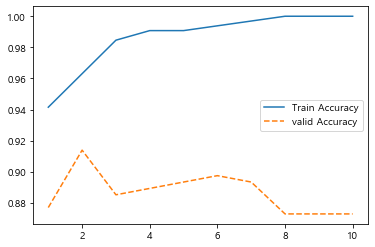

In [15]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle = "--", label = "valid Accuracy")
plt.legend()

적절한 dataset을 선택한다. 여기서는 train과 validation accuracy 곡선을 고려하여, 2와 6을 선정하였다.

In [16]:
v_feature_name = df_train_x.columns

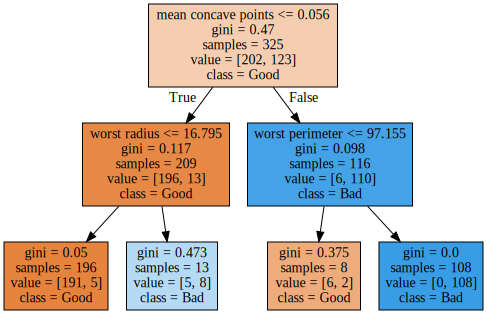

In [43]:
tree_low = DecisionTreeClassifier(max_depth=2, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names=["Good", "Bad"],
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

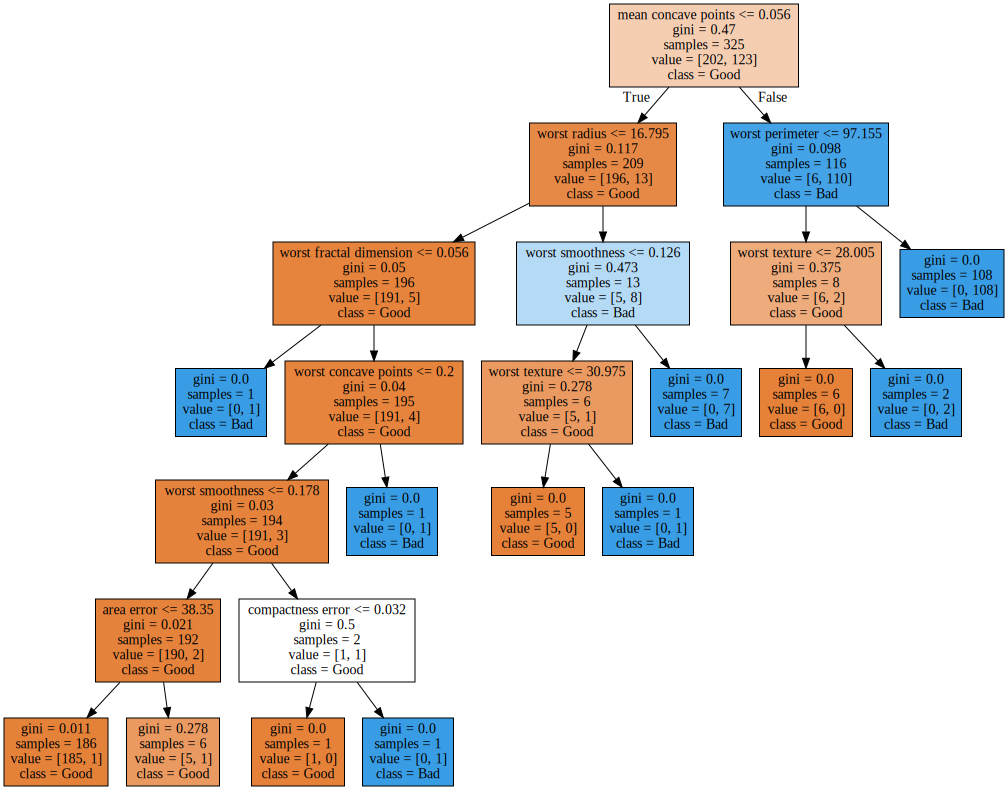

In [44]:
tree_high = DecisionTreeClassifier(max_depth=6, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file = "tree_high.dot", class_names=["Good", "Bad"],
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

6의 경우, depth가 너무 깊어져서 분류가 과도하게 되는 경향이 있으므로 2를 선택한다.

In [46]:
# split 조정
train_accuracy = []; valid_accuracy = []

para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(max_depth = 2, min_samples_split=v_min_samples_split, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["validAccuracy"] = valid_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,validAccuracy
0,10,0.963,0.914
1,20,0.963,0.914
2,30,0.963,0.914
3,40,0.963,0.914
4,50,0.963,0.914
5,60,0.963,0.914
6,70,0.963,0.914
7,80,0.963,0.914
8,90,0.963,0.914
9,100,0.963,0.914


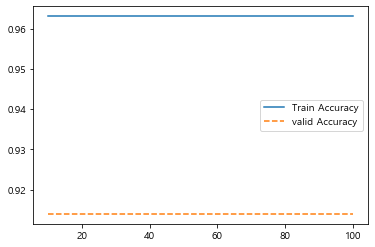

In [47]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle = "--", label = "valid Accuracy")
plt.legend()

모두 유사하게 나오므로 20을 선택한다.

In [49]:
# leaf 조정
train_accuracy = []; valid_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_sample_leaf in para_leaf:
    tree=DecisionTreeClassifier(max_depth = 2, min_samples_leaf=v_min_sample_leaf, min_samples_split=20, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["validAccuracy"] = valid_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,validAccuracy
0,2,0.963,0.914
1,4,0.963,0.914
2,6,0.963,0.914
3,8,0.963,0.914
4,10,0.957,0.914
5,12,0.951,0.922
6,14,0.948,0.906
7,16,0.942,0.877
8,18,0.942,0.877
9,20,0.942,0.877


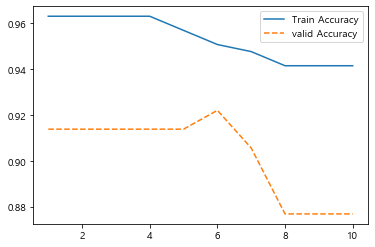

In [50]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle = "--", label = "valid Accuracy")
plt.legend()

곡선의 추이에 따라 4와 6을 선택한다.

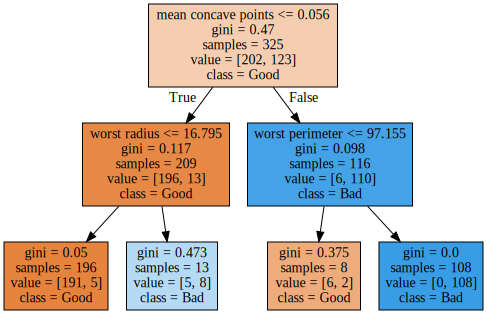

In [51]:
tree_low = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names=["Good", "Bad"],
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

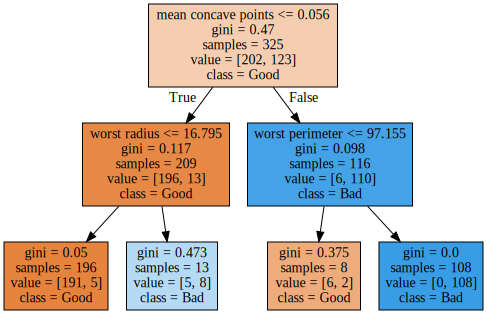

In [52]:
tree_high = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=6, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file = "tree_high.dot", class_names=["Good", "Bad"],
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

둘 사이에 거의 차이가 없으므로 6을 선택한다.

In [57]:
# 최종 모델
tree_final = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=6, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

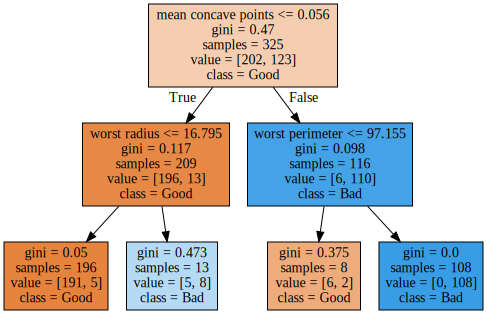

In [58]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
               feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

정확도를 따져보면, test dataset에서 92.4%의 설명력을 가진다.

confusion matrix는 0-0:98, 0-1:7(error), 1-0:6(error), 1-1:60 을 나타낸다.

In [59]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.924

Confusion matrix: 
[[98  7]
 [ 6 60]]


변수 중요도를 살펴본다.

변수 중요도는 mean concave points, worst radius, worst perimeter 순이다.

In [36]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,mean concave points,0.864
20,worst radius,0.063
22,worst perimeter,0.062
6,mean concavity,0.010
12,perimeter error,0.002
0,mean radius,0.000
17,concave points error,0.000
28,worst symmetry,0.000
27,worst concave points,0.000
26,worst concavity,0.000


Text(0, 0.5, '설명변수')

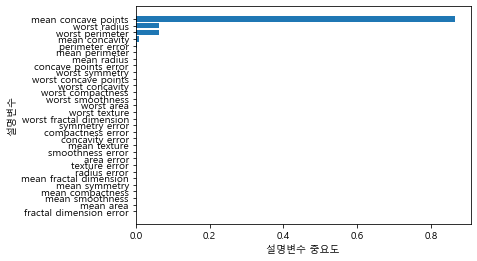

In [37]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

GridSearchCV를 통해서, 최적의 parameter를 찾아보았다.

직접 탐사했을 때와 거의 유사한 값을 가진다. test dataset에서 약 92.4%의 설명력을 가진다.

In [63]:
estimator = DecisionTreeClassifier()

param_grid = {"max_depth" : para_depth, "min_samples_split" : para_split, "min_samples_leaf" : para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model :\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))
print("\ntest score : \n{:.3f}\n".format(grid_dt.score(df_test_x, df_test_y)))

C:\Users\PIRL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model :
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

best parameter : 
{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 70}

best score : 
0.942

test score : 
0.924

